# IMPORTING NECESSARY LIBRARIES

- numpy : for loading data from csv, performing calculations during modle creation, training and evaluation

- matplotlib.pyplot  : for visualising images and results

- random : for initialization and random picking of images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# IMPORTING DATASETS
    
- The shape of the input layer i.e the input sample must be (n,m) for calculation purposes
- The shape of the ouput should be (10,m) for calculation purposes

    Where

    - n = total number of features (here as it is an image of 28*28 as we flatten it to 784 where each pixel represents a feature for each data sample)

    - m = total number of data samples that we are using for training/testing (here for training we have total 1000 images or data samples)

    - 10 = the output classes (as numbers from 0 to 9)  


In [2]:
X_train= np.loadtxt('features_train.csv',delimiter=',')
Y_train=np.loadtxt('label_train.csv',delimiter=',')

# VISUALISING DATA

- You will observe by running below code that the size of X_train will be (1000,784) and that of Y_train be (1000,10)

- Thus we will have to take transpose 


In [3]:
print(f"\nThe shape of X_train is {X_train.shape}")
print("\n",X_train)
print(f"\nThe shape of Y_train is {Y_train.shape}")
print("\n",Y_train)


The shape of X_train is (1000, 784)

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of Y_train is (1000, 10)

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [4]:
X_train=X_train.T
Y_train=Y_train.T
print(f"\nThe shape of X_train now is {X_train.shape}")
print(f"\nThe shape of Y_train now is {Y_train.shape}")


The shape of X_train now is (784, 1000)

The shape of Y_train now is (10, 1000)


# LET'S TAKE A LOOK AT THE IMAGE OF ONE OF OUR NUMBERS

<function matplotlib.pyplot.show(close=None, block=None)>

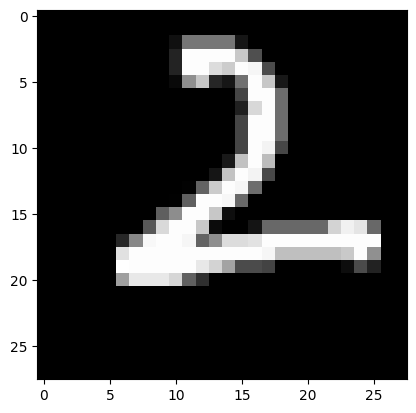

In [5]:
rand_idx=int(random.randrange(0,X_train.shape[1])) # generate a random index  (as we took transpose we need the second index of the shape)
plt.imshow(X_train[:,rand_idx].reshape(28,28),cmap='gray') # want all rows(pixels) and choose the column(rand_idx i.e image) and reshape it
plt.show

# MODEL ARCHITECTURE 

- THE NEURAL NETWORK MODEL WHICH WE ARE BUILDING HERE WILL HAVE THE FOLLOWING ARCHITECTURE:

    - INPUT LAYER: TAKES AN IMAGE FLATTENED OF SIZE (28*28 PIXELS =784)
    - HIDDEN LAYER: CONSISTING OF 1000 NEURONS WITH ReLU ACTIVATION FUNCTION
    - OUTPUT LAYER: CONSISTING OF 10 NEURONS AS OUTPUT MUST ONE OF THE 10 NUMBERS 

## Model is implemented using the following equations with the derivations provided int the derivations.pdf 

# How does the model work ?

## First we initialize the parameters:

### What are the parameters ?


- For Hidden Layer the shape of weight must be:

    - W1.shape = (1000,784) -> Weights  

    As the next 1000 because the hidden layer consists of 1000 neurons
    and 784 because the input fed to the layer comes from input layer having 784 neurons.

    - b1.shape = (1000,1)   -> Bias

    As 1000 neurons and each neuron has one bias 

    
- For the Output Layer the shape of the weight and bias must be:

    - W2.shape = (10,1000)  -> Weights
    
    - b2.shape = (10,1)     -> Bias
    
- We Initialize the weights randomly as they will be updated and recalculated to fit the model during backpropogation , and the biases we will initialize to zero.

# Following will be the steps for forward propogation 

- Z1 = W1 * X + B1
- A1 = f( Z1 )   -> ACTIVATION FUNCTION
- Z2 = W2 * A1 + B2 
- A2 = SoftMax( Z2 )



## Softmax

- $ ai = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}} $

## Cost Function

- $Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

- $Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$

# Following will be the steps for backward propogation

- Note: that dZ or anything means derivative of cost w.r.t Z or etc

- $dZ_2 = ( A_2 - Y )$

- $ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

- $ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



- $dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

- $dW_1 = \frac{1}{m}.dZ_1.X^T$

- $dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

# Following steps will be used for updating parameters during backpropogation to reduce the cost

- $ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

- $ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

- $ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

- $ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$

# Activation Functions

- For the hidden layer we will be trying out two activation functions ReLU and tanh 

- For the output layer we will be using the softmax activation function as multiclass classification

In [6]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expzi=np.exp(x)
    return expzi/np.sum(expzi,axis=0)  #according to the formula over all classes


## For backpropogation we will need the derivative of these functions 
- $ deriv(tanh(x))= \frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)$

- $ deriv(relu(x))= \frac{d}{dx} \text{ReLU}(x) =\begin{cases}1, & \text{if } x > 0 \\0, & \text{if } x \leq 0\end{cases}$


In [7]:
def deriv_tanh(x):
    return 1 - np.power(np.tanh(x),2)

def deriv_relu(x):
    return np.array(x>0, dtype=np.float32)

# Weight and Bias Initialization 

- We need to be careful while initializing the weights , why ?

1.Vanishing Gradients (too small weights)
Activations shrink through each layer.

Gradients become close to 0 as they backpropagate.

Result: Early layers don’t learn.

2.Exploding Gradients (too large weights)
Activations grow exponentially.

Gradients become huge and unstable.

Result: Weights blow up, learning diverges.



In [8]:
def parameter_initialize(n_1,n_2,n_3,activation):

    w1 = np.random.randn(n_2, n_1)*0.01  #Initialize it to not very big not very small values
    b1 = np.zeros((n_2, 1))
    w2 = np.random.randn(n_3, n_2)*0.01  #same here
    b2 = np.zeros((n_3, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters
    

# Forward Propogation Implementation

In [9]:
def forward_prop(x,weight_bias,activation):
    w1=weight_bias["w1"]
    w2=weight_bias["w2"]
    b1=weight_bias["b1"]
    b2=weight_bias["b2"]

    z1=np.dot(w1,x)+b1
    a1=relu(z1)
    if(activation=='tanh'):
        a1=tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    
    forward_val={"z1":z1,"z2":z2,"a1":a1,"a2":a2}

    return forward_val


# Cost Function Implementation 

## The following equations to be implemented 

- $Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

- $Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  


- Here m is the number of images or training samples we have 

- Note that we have m images and n=10 classes  thus cost boils down to nothing but the summation of product of true result with logarithm of model result for that particular epoch.


In [10]:
def cost_function(a2, y):

    m = y.shape[1]  # as y shape is (10*1000) classes*images
    cost = np.sum(y*np.log(a2)+1e-10)  #both y and a2 of same shape so summation of product  (also if by chance log value is zero 1e-10 will handle )
    return (-1/m) * cost

# Back Propogation Equations

As deriveed in the pdf we need to implement the following equations for back propogation 

- Note: Here for eg. dZ_2 means derivate of Loss function w.r.t Z_2

- $dZ_2 = ( A_2 - Y )$  

- $ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

- $ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$  --> Column wise summation



- $dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

- $dW_1 = \frac{1}{m}.dZ_1.X^T$

- $dB_1 = \frac{1}{m}.sum(dZ_1, 1)$   --> Column wise summation  


- Also it is important to note here that for equations 3 and 6  we have use numpy attribute which takes column wise sum i.e 
eg: dz2 is of shape(10,1000) thus to convert it to (10,1 ) we use this as in derivation specified

In [11]:
def back_prop(x,y,weight_bias,forward_val,activation):

    m=x.shape[1]  # no of training samples

    w1=weight_bias["w1"]
    w2=weight_bias["w2"]
    b1=weight_bias["b1"]
    b2=weight_bias["b2"]

    a1=forward_val["a1"]
    a2=forward_val["a2"]


    #eq1
    dz2=a2-y

    #eq2
    dw2=(1/m)*np.dot(dz2,a1.T)

    #eq3

    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True) #column wise sum  

    #eq4
    dz1 = np.dot(w2.T, dz2)*deriv_relu(a1)
    if activation=='tanh':
        dz1 = np.dot(w2.T, dz2)*deriv_tanh(a1)
    


    #eq5

    dw1 = 1/m * np.dot(dz1, x.T)

    #eq6
    db1 = 1/m * np.sum(dz1, axis = 1, keepdims = True)  #column wise sum


    ## Returning the Gradients/Derivatives
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients


GRADIENT DESCENT UPDATE OF PARAMETERS FUNCTION

In [12]:
def gradient_descent(weight_bias, gradients, learning_rate):


    w1 = weight_bias['w1']
    b1 = weight_bias['b1']
    w2 = weight_bias['w2']
    b2 = weight_bias['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

# updating the weights and biases
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    # Returning the updated parameters
    update_parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return update_parameters

# STEPS TO RUN THE MODEL

1. Initialize the weights and biases at the start.
2. Initialize the learning rate,the number of epochs and the size of the hidden layer.
3. Then we will be running the following steps in loop for the number of epochs specified.

 - forward_prop(x,weight_bias,activation)
 - cost_function(a2, y)
 - back_prop(x,y,weight_bias,forward_val,activation)
 - gradient_descent(weight_bias, gradients, learning_rate)


At the end we will be returning the weights and biases for our trained model and also to visulaize the results we will be keeping a track of cost at every few steps of epochs.



In [13]:
def neural_network_model(x,y,hidd_size,learning_rate,epochs,activation):

    n_x=x.shape[0]    #the number of pixels/features here 784(28*28)
    n_y=y.shape[0]    #the number of output classes here 10


    cost_track=[]
    
    weight_bias=parameter_initialize(n_x,hidd_size,n_y,activation) 

    for i in range(epochs):

        # Forward Propogation
        forward_val=forward_prop(x,weight_bias,activation)
        a2=forward_val['a2']

        # Calculate the cost 

        cost=cost_function(a2,y)

        #Back Propogation do

        grads=back_prop(x,y,weight_bias,forward_val,activation)


        # Do Gradient Descent

        weight_bias=gradient_descent(weight_bias,grads,learning_rate)


        cost_track.append(cost)

        if(i%10==0):
            print(f"Cost after {i}th iteration is = {cost}")
        

    return weight_bias, cost_track

In [14]:
hidden_layer_size=1000 

learning_rate=0.002
epochs=100
activation ='relu'  #you can change accordingly 
# X_train=X_train.T
# Y_train=Y_train.T
print(X_train.shape,Y_train.shape)
weight_bias,cost_list=neural_network_model(X_train,Y_train,hidden_layer_size,learning_rate,epochs,activation)

(784, 1000) (10, 1000)
Cost after 0th iteration is = 8.038495774317218
Cost after 10th iteration is = 0.601896860693428
Cost after 20th iteration is = 0.20241284659760267
Cost after 30th iteration is = 0.10421031070644231
Cost after 40th iteration is = 0.06633493507495965
Cost after 50th iteration is = 0.04786960209233679
Cost after 60th iteration is = 0.037002096493083114
Cost after 70th iteration is = 0.0299274139193631
Cost after 80th iteration is = 0.025021101821335552
Cost after 90th iteration is = 0.021458733881305626


# VISUALIZING THE ERROR OVER THE EPOCHS

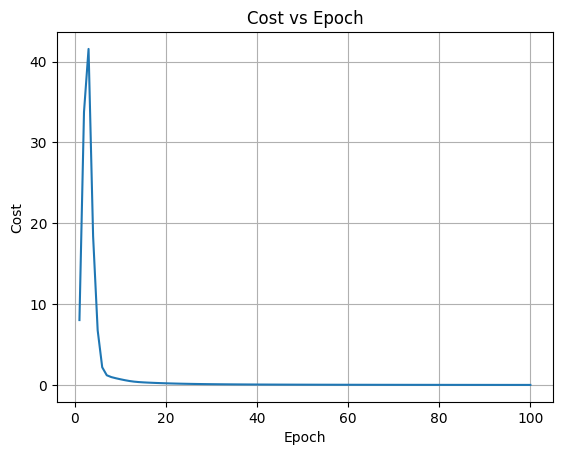

In [15]:


plt.plot(range(1, 101), cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()


# Finding the accuracy of training and testing dataset

In [16]:
def accuracy(x,y,weight_bias,activation):
    forw_prop=forward_prop(x,weight_bias,activation)
    a2=forw_prop["a2"]

    a2=np.argmax(a2,0)

    class_lab=np.argmax(y,0)

    accuraccy_real=np.mean(a2==class_lab)*100

    return accuraccy_real

# Checking the accuracy 

In [17]:
## Training Data

train_acc=accuracy(X_train,Y_train,weight_bias,activation)

#Testing Data

X_test= np.loadtxt('features_test.csv',delimiter=',')
Y_test=np.loadtxt("label_test.csv",delimiter=",")
X_test=X_test.T
Y_test=Y_test.T
test_acc=accuracy(X_test,Y_test,weight_bias,activation)
print(f"\nAccuracy of the Train Dataset is: {train_acc}")

print(f"\nAccuraccy of the Testing Dataset is: {test_acc}")


Accuracy of the Train Dataset is: 100.0

Accuraccy of the Testing Dataset is: 86.85714285714286


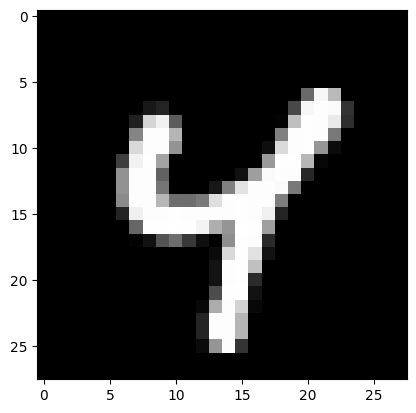

The Model predicts: 4


In [18]:
idx = int(random.randrange(0,X_test.shape[1]))  #ACTUAL OYUTPUT 
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()  

cache = forward_prop(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), weight_bias,activation)  #INPUT THAT PARTICULAR IMAGE ONLY TO THE MODEL
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("The Model predicts:", a_pred[0])